## Visualizing Twitter Data: Analysis Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [5]:
load_data = pd.read_csv('Final Results.csv')
load_data_1 = pd.read_csv('Final Results ND.csv')

In [6]:
load_data['climate_emergency'] = 1
load_data_1['climate_emergency'] = 0
merged = pd.concat([load_data, load_data_1])
accounts = "Case Study Accounts.csv"
accounts = pd.read_csv(accounts)

In [7]:
df = pd.merge(merged, accounts, on='user_ID', how='left')

In [8]:
#adding in the date for easier visualizations

date = []
for x in df['time']: 
    data = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    date.append(data)
    
df["date"] = date   

#adds year column, makes it easier to group
df['year'] = pd.DatetimeIndex(df['date']).year

## Measuring City Department Engagement

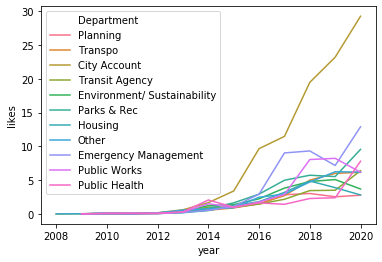

In [9]:
#number of likes over time by department type
department_popularity = df.groupby("Department", as_index=False).sum()


sns.lineplot(x='year', y = "likes", hue="Department", data=df, err_style=None) #, order=None, 
              #hue_order=None, orient=None, color=None, palette=None)


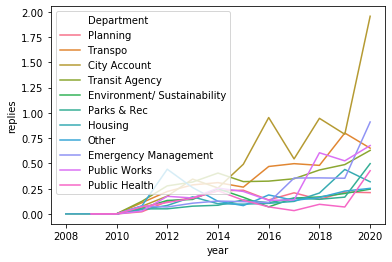

In [10]:
#number of replies over time by department type
sns.lineplot(x='year', y = "replies", hue="Department", data=df, err_style=None)

## Topic Analysis

In [11]:
#creating a list for climate change mentions in tweets to capture #climatechange
cc = []
keys = ["climate change", "climatechange"]

for tweet in df['tweet']:
    match = False 
    for key in keys: 
        if key.lower() in tweet:
            match = True
            break
    cc.append(1 if match else 0)
        
df['cc'] = cc

In [13]:
#creating a list to capture broadly environmental topics/phrases
enviro = []
keys = ["climate", "climate change", "global warming","sea level rise", "greenhouse gas", "emissions", 
         "resilience", "sustainable", 
         "sustainability", "green", "carbon", "environmental justice", "pollution", "environmental"]

for tweet in df['tweet']:
    match = False 
    for key in keys: 
        if key.lower() in tweet:
            match = True
            break
    enviro.append(1 if match else 0)
        
df['enviro'] = enviro

In [14]:
#creating a list ot capture COVID topics
covid = []
keys = ["coronavirus", "COVID", "COVID-19", "SARS-CoV-2"]

for tweet in df['tweet']:
    match = False 
    for key in keys: 
        if key.lower() in tweet:
            match = True
            break
    covid.append(1 if match else 0)
        
df['covid'] = covid

232

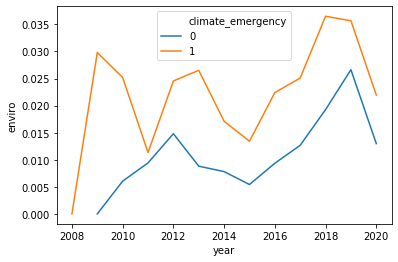

In [16]:
#Line plot of environmental topics over time, split by cities that have & have declared a climate emergency
sns.lineplot(x='year', y = "enviro", hue="climate_emergency", data=df, palette = color, err_style=None)

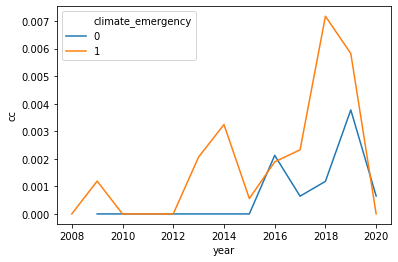

In [17]:
#Line plot of climate change mentions over time, split by cities that have & have declared a climate emergency
sns.lineplot(x='year', y = "cc", hue="climate_emergency", data=df, palette = color, err_style=None)

In [20]:
df['hue_test']  = "Other"
df.loc[df["cc"] == 1, 'hue_test'] = "Climate Change"
df.loc[df["covid"] == 1, 'hue_test'] = "COVID-19"
df['tweeted'] = 1
df['hue_test'].value_counts()

Other             73675
COVID-19            232
Climate Change      142
Name: hue_test, dtype: int64

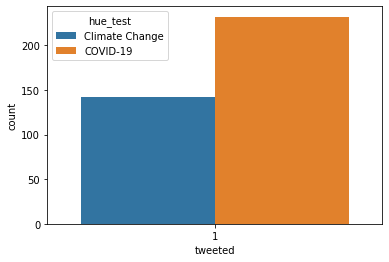

In [22]:
#total number of mentions about climate change v. COVID
df1 = df.loc[df['hue_test'] != "Other"]


sns.countplot(x='tweeted', hue="hue_test", data=df1)

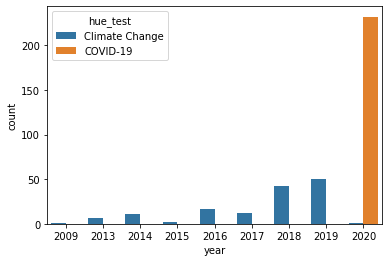

In [24]:
sns.countplot(x='year', hue="hue_test", data=df1)

## Content Analysis & Engagement

In [34]:
#looking at average number of likes and replies
df.groupby('cc').mean()

,Unnamed: 0,likes,replies,climate_emergency,Emergency,year,enviro,covid,tweeted
cc,,,,,,,,,
0,1731.721271,3.215406,0.289066,0.481754,0.483107,2015.563641,0.017197,0.003139,1.0
1,923.450704,7.915493,0.394366,0.725352,0.725352,2017.415493,1.000000,0.000000,1.0


In [32]:
#looking at average number of likes and replies
df1.groupby('covid').mean()

,Unnamed: 0,likes,replies,climate_emergency,Emergency,year,cc,enviro,tweeted
covid,,,,,,,,,
0,923.450704,7.915493,0.394366,0.725352,0.725352,2017.415493,1.0,1.000000,1.0
1,2696.181034,15.870690,1.577586,0.629310,0.629310,2020.000000,0.0,0.012931,1.0


In [33]:
#looking at average number of likes and replies
df1.groupby('enviro').mean()

,Unnamed: 0,likes,replies,climate_emergency,Emergency,year,cc,covid,tweeted
enviro,,,,,,,,,
0,2717.475983,16.048035,1.598253,0.637555,0.637555,2020.000000,0.00000,1.00000,1.0
1,926.496552,7.800000,0.386207,0.710345,0.710345,2017.468966,0.97931,0.02069,1.0
